In [7]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import naive_bayes
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
import emoji 
import regex
from sklearn.linear_model import SGDClassifier
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier
import numpy as np
import re
import inflect 
import string
from textblob import TextBlob
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
#Reading data form the .csv file
df = pd.read_csv('ISEAR.csv')
  
# shape of dataset 
print("Shape:", df.shape)

#df = df.drop('id', axis=1)
#df = df.drop('No', axis=1)

# column names 
#print("\nFeatures:", df.columns) 

Shape: (7516, 3)


In [22]:
#for graph rep.
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size

8.0
6.0


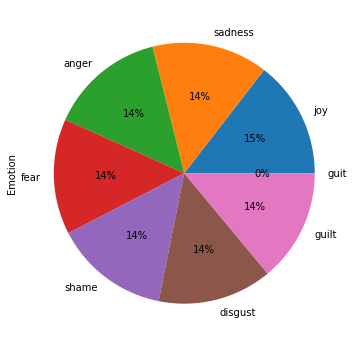

In [23]:
#Graph showing the consistency in the dataset
df.Emotion.value_counts().plot(kind='pie', autopct='%1.0f%%')

In [24]:
#Preprocessing Part.

# Making all letters lowercase
df['Comment']=df['Comment'].str.lower()

In [25]:
# convert number into words 
p = inflect.engine() 

def convert_number(text): 
    # split string into list of words 
    temp_str = text.split() 
    # initialise empty list 
    new_string = [] 
  
    for word in temp_str: 
        # if word is a digit, convert the digit 
        # to numbers and append into the new_string list 
        if word.isdigit(): 
            temp = p.number_to_words(word) 
            new_string.append(temp) 
  
        # append the word as it is 
        else: 
            new_string.append(word) 
  
    # join the words of new_string to form a string 
    temp_str = ' '.join(new_string) 
    return temp_str

df['Comment']=df['Comment'].apply(lambda x:convert_number(x))

In [26]:
# Remove numbers 
def remove_numbers(text): 
    result = re.sub(r'\d+', '', text) 
    return result 
df['Comment']=df['Comment'].apply(lambda x:remove_numbers(x))

# remove punctuation 
def remove_punctuation(text): 
    translator = str.maketrans('', '', string.punctuation) 
    return text.translate(translator) 
df['Comment']=df['Comment'].apply(lambda x:remove_punctuation(x))

# remove whitespace from text 
def remove_whitespace(text): 
    return  " ".join(text.split()) 
df['Comment']=df['Comment'].apply(lambda x:remove_whitespace(x))

In [27]:
#Removing the common words from the dataset.
freq = pd.Series(' '.join(df['Comment']).split()).value_counts()[:10]
freq

i       10815
the      6120
a        6086
to       4756
my       4743
and      4649
was      4559
when     3679
of       3023
in       2794
dtype: int64

In [28]:
freq = list(freq.index)
df['Comment'] = df['Comment'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['Comment'].head()

0    on days feel close partner other friends feel ...
1    every time imagine that someone love or could ...
2    had been obviously unjustly treated had no pos...
3    think about short time that we live relate it ...
4    at gathering found myself involuntarily sittin...
Name: Comment, dtype: object

In [29]:
#Removing the un-common words from the dataset.
freq = pd.Series(' '.join(df['Comment']).split()).value_counts()[-10:]
freq

detriment     1
stationed     1
unkind        1
inspite       1
competent     1
guard         1
premature     1
colleage      1
videotapes    1
sororoty      1
dtype: int64

In [30]:
freq = list(freq.index)
df['Comment'] = df['Comment'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['Comment'].head()

0    on days feel close partner other friends feel ...
1    every time imagine that someone love or could ...
2    had been obviously unjustly treated had no pos...
3    think about short time that we live relate it ...
4    at gathering found myself involuntarily sittin...
Name: Comment, dtype: object

In [31]:
#Correcting the words.
df['Comment'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    on days feel close partner other friends feel ...
1    every time imagine that someone love or could ...
2    had been obviously unjustly treated had no pos...
3    think about short time that we live relate it ...
4    at gathering found myself involuntarily sittin...
Name: Comment, dtype: object

In [33]:
#Collecting the stopwords.
#stop = set(stopwords.words('english'))

#Convert a collection of raw documents to a matrix of TF-IDF features.
vectorizer= TfidfVectorizer(use_idf=True,lowercase=True,strip_accents="ascii")

In [34]:
#Encoding output labels as follow:
lbl_enc = preprocessing.LabelEncoder()
y = lbl_enc.fit_transform(df.Emotion.values)

In [35]:
#Inversing the original value of the labels.
y=lbl_enc.inverse_transform(y)
y

array(['joy', 'fear', 'anger', ..., 'fear', 'guilt', 'fear'], dtype=object)

In [36]:
#Training vectors.
y=df.Emotion

In [37]:
#Target values.
x=vectorizer.fit_transform(df.Comment)

In [38]:
#shape of each training and target value.
print(y.shape)
print(x.shape)

(7516,)
(7516, 9174)


In [39]:
# Splitting into training and testing data.
X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.1)

In [40]:
#Training the model using Multinomial naive bayes algorithm.
clf=naive_bayes.MultinomialNB()
clf.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [42]:
#Predicting the emotion of the text using our already trained model
emoji_present=0
print("Enter the line for prediction.")
pred_input=input()
#"I am very happy today! The atmosphere looks cheerful"
m=list([pred_input])

#pre-processing part of the input taken.
m_v=vectorizer.transform(m)

#putting the input into model already trained.
new_value=clf.predict(m_v)

print("The Emotion of the line is:")
print(clf.predict(m_v))

Enter the line for prediction.
today is bad day
The Emotion of the line is:
['sadness']


In [43]:
# making predictions on the testing set
y_pred = clf.predict(X_test) 

In [44]:
# comparing actual response values (y_test) with predicted response values (y_pred) 
print("Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
results = confusion_matrix(y_test, y_pred) 
  
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(y_test, y_pred)) 
print('Report : ')
print(classification_report(y_test, y_pred)) 

Naive Bayes model accuracy(in %): 54.25531914893617
Confusion Matrix :
[[46 10  9 19  7  9 12]
 [22 48  9  9  4  5  9]
 [ 4  1 66  7  8  6  4]
 [13  1 12 54  7 11  8]
 [ 3  0  2  5 88 12  4]
 [ 6  3  7 11  6 64  3]
 [20 10 12 20 10  4 42]]
Accuracy Score : 0.5425531914893617
Report : 
              precision    recall  f1-score   support

       anger       0.40      0.41      0.41       112
     disgust       0.66      0.45      0.54       106
        fear       0.56      0.69      0.62        96
       guilt       0.43      0.51      0.47       106
         joy       0.68      0.77      0.72       114
     sadness       0.58      0.64      0.61       100
       shame       0.51      0.36      0.42       118

   micro avg       0.54      0.54      0.54       752
   macro avg       0.55      0.55      0.54       752
weighted avg       0.55      0.54      0.54       752



In [45]:
#for emoji part.

def split_count(text):
    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)
    return emoji_list

#line = ["😀 🤔  Hello how are you?"]

counter = split_count(m[0])
if len(counter)>0:
    emoji_present=1
#print(' '.join(emoji for emoji in counter))
new_value1=[]
for x in counter:
    if(x=="😀" or x=="😁" or x=="😂" or x=="🤣" or x=="😃" or x=="😄" or x=="😅" or x=="😆"):
        new_value1="joy"
    if(x=="😬" or x=="😠" or x=="😐" or x=="😑" or x=="😡" or x=="😣" or x=="😤" or x=="😾" or x=="🤬"):
        new_value1="anger"
    if(x=="💩"):
        new_value1="disgust"
    if(x=="😮" or x=="🥶" or x=="🥵" or x=="😱" or x=="😰" or x=="😨" or x=="😧" or x=="😦" or x=="😲"):
        new_value1="fear"
    if(x=="😕" or x=="😔" or x=="😢" or x=="😭" or x=="😫" or x=="😨" or x=="🥺" or x=="🤒" or x=="😪"):
        new_value1="sad"
    if(x=="🤗" or x=="🤩" or x=="🤪" or x=="😲"):
        new_value1="surprise"   

In [46]:
#print the emoji is present.
print("Emoji is present in the statement.\nHence the Emotion of the statement can be as below:\n")
if (emoji_present==1):
    if(new_value[0]==new_value1):
        print(new_value)
    else:
        print("Emotion of the emoji is different from the emotion of the statement.")
        print("Emotion of statement:",new_value[0],"\nEmotion of the emoji:",new_value1)
        print("This can be a sarcastic comment")

Emoji is present in the statement.
Hence the Emotion of the statement can be as below:



In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

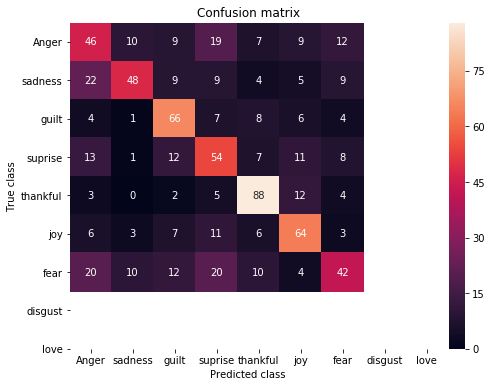

In [50]:
LABELS = ["Anger","sadness","guilt","suprise","thankful","joy","fear","disgust","love"]
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize =(8,6))
sns.heatmap(conf_matrix,xticklabels=LABELS,yticklabels=LABELS,annot=True, fmt='d');
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

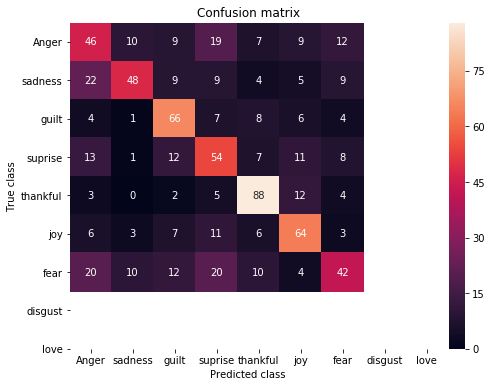

In [51]:
LABELS = ["Anger","sadness","guilt","suprise","thankful","joy","fear","disgust","love"]
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize =(8,6))
sns.heatmap(conf_matrix,xticklabels=LABELS,yticklabels=LABELS,annot=True,fmt = "d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()